In [1]:
!pip install -U torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-zq4kbjdv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-zq4kbjdv
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [1]:
!pip install pycocotools

In [2]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os

# List files and directories in My Drive
# for root, dirs, files in os.walk('/content'):
#     print("Root:", root)
#     print("Directories:", dirs)
#     print("Files:", files)
import os
print(os.listdir('/content/drive/MyDrive/train'))

['.ipynb_checkpoints', '1cf12e55-IMG_20231221_130416.jpg', 'a56bf2df-IMG_20231221_155354.jpg', '2228d2bf-IMG_20231221_123330.jpg', '8f52a469-IMG_20231221_160202.jpg', 'be1025a1-IMG_20231221_160205.jpg', 'e9aaee7d-IMG_20231221_130418.jpg', 'e7aa6e51-IMG_20231221_123257.jpg', 'e6718445-IMG_20231221_123140.jpg', 'f755c02e-IMG_20231221_134848.jpg']


In [36]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
DatasetCatalog.remove("custom_train")
DatasetCatalog.remove("custom_val")
MetadataCatalog.remove("custom_train")
MetadataCatalog.remove("custom_val")
# Register the dataset
register_coco_instances("custom_train", {}, "/content/drive/MyDrive/annotations_train.json", "/content/drive/MyDrive/train")
register_coco_instances("custom_val", {}, "/content/drive/MyDrive/annotations_val.json", "/content/drive/MyDrive/val")

custom_metadata = MetadataCatalog.get("custom_train")

In [37]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found")


GPU is available: Tesla T4


In [30]:
!pip install -U detectron2

In [38]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import MetadataCatalog
import os
from detectron2.model_zoo import model_zoo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("custom_train",)
cfg.DATASETS.TEST = ("custom_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300    # Adjust based on your dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Adjust based on your dataset

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True) # The method name is resume_or_load
trainer.train()

[09/14 06:49:09 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/14 06:49:09 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/14 06:49:32 d2.utils.events]:  eta: 0:03:49  iter: 19  total_loss: 1.974  loss_cls: 1.023  loss_box_reg: 0.2221  loss_mask: 0.693  loss_rpn_cls: 0.008655  loss_rpn_loc: 0.01869    time: 0.9055  last_time: 0.8761  data_time: 0.4375  last_data_time: 0.4580   lr: 1.6068e-05  max_mem: 3281M
[09/14 06:50:43 d2.utils.events]:  eta: 0:03:19  iter: 39  total_loss: 1.6  loss_cls: 0.6678  loss_box_reg: 0.2087  loss_mask: 0.6905  loss_rpn_cls: 0.007899  loss_rpn_loc: 0.01235    time: 0.8682  last_time: 1.0183  data_time: 0.3576  last_data_time: 0.5969   lr: 3.2718e-05  max_mem: 3281M
[09/14 06:51:01 d2.utils.events]:  eta: 0:03:14  iter: 59  total_loss: 1.249  loss_cls: 0.3256  loss_box_reg: 0.2372  loss_mask: 0.6828  loss_rpn_cls: 0.004889  loss_rpn_loc: 0.0104    time: 0.8881  last_time: 1.1608  data_time: 0.4646  last_data_time: 0.7265   lr: 4.9367e-05  max_mem: 3281M
[09/14 06:51:20 d2.utils.events]:  eta: 0:03:01  iter: 79  total_loss: 1.135  loss_cls: 0.2157  loss_box_reg: 0.2373  loss_

In [40]:
import matplotlib.pyplot as plt


[09/14 06:57:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

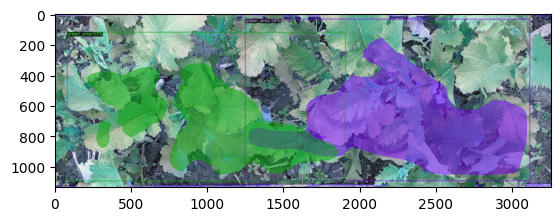

In [41]:
# Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# Make predictions
im = cv2.imread("/content/drive/MyDrive/test/100.jpg")
outputs = predictor(im)

# Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()


In [ ]:
import os

file_path = '/content/sample_data/train/images\\8f52a469-IMG_20231221_160202.jpg'
print(os.path.exists(file_path))


False


In [42]:
#Green: Represents the predicted masks for the detected objects. This is often used to fill the area where the model predicts an object is present.
#Blue: Used for drawing bounding boxes or contour lines around detected objects. It might also be used to indicate class-specific boundaries or highlight different classes.**bold text**